# Библиотека `pandas`: часть 2

Файл `Fishing.csv` содержит результаты опроса о рыбалке: респонденты, заполняя опросник, подробно описывали свою недавнюю рыбалку.

**Описание переменных в датафрейме:**


* `mode`: выбранный тип рыбалки: на берегу (`beach`), на пирсе (`pier`), в своей лодке (`boat`) и в арендованной лодке (`charter`);

* `price`: стоимость выбранного типа рыбалки;

* `catch`: коэффициент улова при выбранном типе рыбалки;

* `pbeach`: стоимость рыбалки на берегу;

* `ppier`: стоимость рыбалки на пирсе;

* `pboat`: стоимость рыбалки на своей лодке;

* `pcharter`: стоимость рыбалки на арендованной лодке;

* `cbeach`: коэффициент улова на рыбалке на берегу;

* `cpier`: коэффициент улова на рыбалке на пирсе;

* `cboat`: коэффициент улова на рыбалке на своей лодке;

* `ccharter`: коэффициент улова на рыбалке на арендованной лодке;

* `income`: доход в месяц.

Подробнее об опросе и исследовании можно почитать в [статье](https://core.ac.uk/download/pdf/38934845.pdf) J.Herriges, C.Kling *"Nonlinear Income Effects in Random Utility Models"* (1999).

### Задание 1

Загрузить таблицу из файла `Fishing.csv` и сохранить её в датафрейм `dat`. 
Вывести на экран первые 8 строк загруженного датафрейма.

In [1]:
import pandas as pd
import numpy as np

dat = pd.read_csv("Fishing.csv")
dat.head()

,Unnamed: 0,Unnamed: 0.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income
0,0,1,charter,182.930,0.5391,157.930,157.930,157.930,182.930,0.0678,0.0503,0.2601,0.5391,7083.3317
1,1,2,charter,34.534,0.4671,15.114,15.114,10.534,34.534,0.1049,0.0451,0.1574,0.4671,1249.9998
2,2,3,boat,24.334,0.2413,161.874,161.874,24.334,59.334,0.5333,0.4522,0.2413,1.0266,3749.9999
3,3,4,pier,15.134,0.0789,15.134,15.134,55.930,84.930,0.0678,0.0789,0.1643,0.5391,2083.3332
4,4,5,boat,41.514,0.1082,106.930,106.930,41.514,71.014,0.0678,0.0503,0.1082,0.3240,4583.3320


### Задание 2

Добавить, используя метод `.apply()`, столбец `log_income`, содержащий натуральный логарифм доходов респондентов.

In [3]:
dat['log_income'] = dat['income'].apply(np.log)
dat.head()

,Unnamed: 0,Unnamed: 0.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income
0,0,1,charter,182.930,0.5391,157.930,157.930,157.930,182.930,0.0678,0.0503,0.2601,0.5391,7083.3317,8.865500
1,1,2,charter,34.534,0.4671,15.114,15.114,10.534,34.534,0.1049,0.0451,0.1574,0.4671,1249.9998,7.130899
2,2,3,boat,24.334,0.2413,161.874,161.874,24.334,59.334,0.5333,0.4522,0.2413,1.0266,3749.9999,8.229511
3,3,4,pier,15.134,0.0789,15.134,15.134,55.930,84.930,0.0678,0.0789,0.1643,0.5391,2083.3332,7.641724
4,4,5,boat,41.514,0.1082,106.930,106.930,41.514,71.014,0.0678,0.0503,0.1082,0.3240,4583.3320,8.430182


### Задание 3

Посчитать для каждого респондента абсолютное значение отклонения `price` от `pbeach`  и сохранить результат в столбец `pdiff`.

***Подсказка 1:*** для нахождения абсолютного значения числа используется функция `abs()`. Пример:

    abs(-8)
    8

***Подсказка 2:*** пример с lamda-функцией в первом уроке этого модуля.

In [67]:
f = lambda x: abs(x.max() - x.min())
dat['pdiff'] = dat.loc[:, ['price', 'pbeach']].apply(f, axis=1
dat.head()

,Unnamed: 0,Unnamed: 0.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income,pdiff
1013,1013,1014,beach,1.29,0.5333,1.29,1.29,39.99,74.99,0.5333,0.4522,0.2413,1.0266,416.66668,6.032287,0.0
1157,1157,1158,pier,1.29,0.4522,1.29,1.29,39.99,74.99,0.5333,0.4522,0.1665,0.3975,416.66668,6.032287,0.0
1105,1105,1106,pier,1.29,0.4522,1.29,1.29,39.99,74.99,0.5333,0.4522,0.0051,1.0266,416.66668,6.032287,0.0
1012,1012,1013,beach,2.29,0.5333,2.29,2.29,70.99,105.99,0.5333,0.4522,0.1665,0.3975,1249.99980,7.130899,0.0
1116,1116,1117,pier,2.29,0.4522,2.29,2.29,70.99,105.99,0.5333,0.4522,0.2413,1.0266,1249.99980,7.130899,0.0


### Задание 4

Сгруппировать наблюдения в таблице по признаку тип рыбалки (`mode`) и вывести для каждого типа среднюю цену (`price`), которую респонденты заплатили за рыбалку.

In [68]:
dat.groupby('mode').agg('mean').loc[ : , 'price']

mode
beach      35.699493
boat       41.606813
charter    75.096942
pier       30.571326
Name: price, dtype: float64

### Задание 5

Сгруппировать наблюдения в таблице по признаку тип рыбалки (`mode`) и вывести для каждого типа разницу между медианным и средним значением цены (`price`), которую респонденты заплатили за рыбалку.

**Посказка:** можно написать свою lambda-функцию для подсчёта разницы между медианой и средним и применить её внутри метода для агрегирования. Внимание: название самостоятельно написанной функции будет уже вводиться без кавычек. 

In [69]:
abs(dat.groupby('mode').agg('median').loc[ : , 'price'] - dat.groupby('mode').agg('mean').loc[ : , 'price'])

mode
beach      16.391493
boat       17.004813
charter    18.226942
pier       13.942326
Name: price, dtype: float64

In [70]:
func = lambda x: abs(x.median() - x.mean())
dat.groupby('mode').agg(func).loc[ : , 'price']

mode
beach      16.391493
boat       17.004813
charter    18.226942
pier       13.942326
Name: price, dtype: float64

### Задание 6

Сгруппировать наблюдения в таблице по признаку тип рыбалки (`mode`) и сохранить полученные датафреймы (один для каждого типа рыбалки) в отдельные csv-файлы. В итоге должно получиться четыре разных csv-файла.

**Подсказка 1:** можно запустить следующий код и посмотреть, что получится: 

In [71]:
for name, data in dat.groupby("mode"):
    print(name, data)

beach       Unnamed: 0  Unnamed: 0.1   mode    price   catch   pbeach    ppier  \
1013        1013          1014  beach    1.290  0.5333    1.290    1.290   
1012        1012          1013  beach    2.290  0.5333    2.290    2.290   
336          336           337  beach    2.290  0.0678    2.290    2.290   
1011        1011          1012  beach    3.290  0.5333    3.290    3.290   
892          892           893  beach    3.870  0.5333    3.870    3.870   
...          ...           ...    ...      ...     ...      ...      ...   
872          872           873  beach  121.836  0.5333  121.836  121.836   
168          168           169  beach  124.350  0.2537  124.350  124.350   
793          793           794  beach  125.902  0.5333  125.902  125.902   
1178        1178          1179  beach  235.436  0.5333  235.436  235.436   
343          343           344  beach  306.820  0.5333  306.820  306.820   

        pboat  pcharter  cbeach   cpier   cboat  ccharter      income  \
1013   3

**Подсказка 2:** для сохранения датафрейма в файл используется метод `.to_csv()`. Например, такой код сохранит датафрейм `dat` в файл `"Fish.csv"`:

In [0]:
dat.to_csv("Fish.csv")

**Подсказка 3:** для склеивания строк можно использовать оператор `+`, например:

In [0]:
"my_file" + ".xlsx"

'my_file.xlsx'

In [38]:
for name, data in dat.groupby("mode"):
    data.to_csv(name + ".csv")

In [45]:
df1 = pd.read_csv("beach.csv")
df1.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income,pdiff
0,6,6,7,beach,51.934,0.0678,51.934,51.934,191.930,220.930,0.0678,0.0789,0.1643,0.5391,8750.0010,9.076809,0.0
1,14,14,15,beach,74.514,0.2537,74.514,74.514,74.514,93.014,0.2537,0.1498,0.2339,0.6288,8750.0010,9.076809,0.0
2,16,16,17,beach,48.114,0.1049,48.114,48.114,33.534,57.534,0.1049,0.0451,0.1574,0.4671,5416.6667,8.597236,0.0
3,25,25,26,beach,67.784,0.5333,67.784,67.784,17.862,52.862,0.5333,0.4522,0.2413,1.0266,1249.9998,7.130899,0.0
4,33,33,34,beach,9.522,0.0678,9.522,9.522,78.292,107.292,0.0678,0.0789,0.0014,0.0029,3749.9999,8.229511,0.0


In [46]:
df2 = pd.read_csv("boat.csv")
df2.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income,pdiff
0,2,2,3,boat,24.334,0.2413,161.874,161.874,24.334,59.334,0.5333,0.4522,0.2413,1.0266,3749.9999,8.229511,137.540
1,4,4,5,boat,41.514,0.1082,106.930,106.930,41.514,71.014,0.0678,0.0503,0.1082,0.3240,4583.3320,8.430182,65.416
2,8,8,9,boat,34.914,0.0233,34.914,34.914,34.914,53.414,0.2537,0.1498,0.0233,0.0219,3749.9999,8.229511,0.000
3,9,9,10,boat,28.314,0.0233,28.314,28.314,28.314,46.814,0.2537,0.1498,0.0233,0.0219,2916.6666,7.978197,0.000
4,11,11,12,boat,16.722,0.2413,312.144,312.144,16.722,51.722,0.5333,0.4522,0.2413,1.0266,7083.3317,8.865500,295.422


In [47]:
df3 = pd.read_csv("charter.csv")
df3.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income,pdiff
0,0,0,1,charter,182.930,0.5391,157.930,157.930,157.930,182.930,0.0678,0.0503,0.2601,0.5391,7083.3317,8.865500,25.000
1,1,1,2,charter,34.534,0.4671,15.114,15.114,10.534,34.534,0.1049,0.0451,0.1574,0.4671,1249.9998,7.130899,19.420
2,5,5,6,charter,63.934,0.3975,192.474,192.474,28.934,63.934,0.5333,0.4522,0.1665,0.3975,4583.3320,8.430182,128.540
3,7,7,8,charter,56.714,0.0209,15.134,15.134,21.714,56.714,0.0678,0.0789,0.0102,0.0209,2083.3332,7.641724,41.580
4,20,20,21,charter,53.522,0.0058,345.744,345.744,18.522,53.522,0.5333,0.4522,0.0156,0.0058,7916.6663,8.976725,292.222


In [48]:
df4 = pd.read_csv("pier.csv")
df4.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income,pdiff
0,3,3,4,pier,15.134,0.0789,15.134,15.134,55.930,84.930,0.0678,0.0789,0.1643,0.5391,2083.3332,7.641724,0.0
1,10,10,11,pier,34.914,0.0451,34.914,34.914,24.334,48.334,0.1049,0.0451,0.1574,0.4671,3749.9999,8.229511,0.0
2,12,12,13,pier,17.862,0.0451,17.862,17.862,4.122,28.122,0.1049,0.0451,0.0023,0.0046,1249.9998,7.130899,0.0
3,13,13,14,pier,15.134,0.0789,15.134,15.134,55.930,84.930,0.0678,0.0789,0.0014,0.0029,2083.3332,7.641724,0.0
4,15,15,16,pier,33.534,0.0789,33.534,33.534,123.930,152.930,0.0678,0.0789,0.1643,0.5391,5416.6667,8.597236,0.0


### Задание 7

Отсортировать строки в датафрейме в соответствии со значениями `income` в порядке убывания таким образом, чтобы результаты сортировки сохранились в исходном датафрейме.

In [77]:
dat.sort_values('income', ascending = False, inplace=True)
dat

,Unnamed: 0,Unnamed: 0.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income,pdiff
1085,1085,1086,boat,37.896,0.7369,227.376,227.376,37.896,62.896,0.2537,0.1498,0.7369,2.3101,12499.99800,9.433484,189.480
295,295,296,boat,53.686,0.2413,843.186,843.186,53.686,88.686,0.5333,0.4522,0.2413,1.0266,12499.99800,9.433484,789.500
1118,1118,1119,boat,15.790,0.7369,180.006,180.006,15.790,40.790,0.2537,0.1498,0.7369,2.3101,12499.99800,9.433484,164.216
1090,1090,1091,boat,37.896,0.6817,227.376,227.376,37.896,62.896,0.2537,0.1498,0.6817,2.3014,12499.99800,9.433484,189.480
222,222,223,boat,180.006,0.1574,255.798,255.798,180.006,204.006,0.1049,0.0451,0.1574,0.4671,12499.99800,9.433484,75.792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,1180,1181,beach,36.636,0.5333,36.636,36.636,61.146,96.146,0.5333,0.4522,0.1665,0.3975,416.66668,6.032287,0.000
890,890,891,boat,3.870,0.6817,22.446,22.446,3.870,28.870,0.2537,0.1498,0.6817,2.3014,416.66668,6.032287,18.576
882,882,883,charter,28.870,2.3014,22.446,22.446,3.870,28.870,0.2537,0.1498,0.6817,2.3014,416.66668,6.032287,6.424
989,989,990,charter,28.096,2.3014,18.576,18.576,3.096,28.096,0.2537,0.1498,0.6817,2.3014,416.66668,6.032287,9.520


### Задание 8

Отсортировать строки в датафрейме в соответствии со значениями `price` и `income` в порядке возрастания. Можно ли сказать, что люди с более низким доходом и выбравшие более дешёвый тип рыбалки, в целом, предпочитают один тип рыбалки, а люди с более высоким доходом и более дорогой рыбалкой – другой? Ответ записать в виде текстовой ячейки или в виде комментария.

In [87]:
dat.sort_values(['price', 'income'], inplace=True)
# dat.head(50)
# dat.tail(50)
dat

,Unnamed: 0,Unnamed: 0.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income,pdiff
1013,1013,1014,beach,1.290,0.5333,1.290,1.290,39.990,74.990,0.5333,0.4522,0.2413,1.0266,416.66668,6.032287,0.000
1157,1157,1158,pier,1.290,0.4522,1.290,1.290,39.990,74.990,0.5333,0.4522,0.1665,0.3975,416.66668,6.032287,0.000
1105,1105,1106,pier,1.290,0.4522,1.290,1.290,39.990,74.990,0.5333,0.4522,0.0051,1.0266,416.66668,6.032287,0.000
287,287,288,pier,2.290,0.0789,2.290,2.290,2.290,31.290,0.0678,0.0789,0.1643,0.5391,1249.99980,7.130899,0.000
275,275,276,pier,2.290,0.0789,2.290,2.290,2.290,31.290,0.0678,0.0789,0.0971,0.1648,1249.99980,7.130899,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,377,378,boat,328.432,0.0023,511.596,511.596,328.432,352.432,0.1049,0.0451,0.0023,0.0046,12499.99800,9.433484,183.164
588,588,589,charter,330.072,0.0052,106.112,106.112,305.072,330.072,0.2537,0.1498,0.0531,0.0052,6250.00130,8.740337,223.960
446,446,447,charter,335.314,1.0266,578.048,578.048,300.314,335.314,0.5333,0.4522,0.2413,1.0266,8750.00100,9.076809,242.734
211,211,212,charter,387.208,2.3014,115.248,115.248,362.208,387.208,0.2537,0.1498,0.6817,2.3014,7916.66630,8.976725,271.960


<p>Люди с более высоким доходом и более дорогим способом рыбалки предпочитают рыбачить на арендованной лодке,
в то время как люди с более низким доходом и выбравшие более дешёвую рыбалку не используют этот тип вовсе,
склоняясь к рыбалке с пирса или с собственной лодки.<p>

### Задание 9

Любым известным способом проверить, есть ли в датафрейме пропущенные значения. Если есть, удалить строки с пропущенными значениями. Если нет, написать комментарий, что таких нет.

In [88]:
dat.isnull().sum() # Пропущенных значений нет

Unnamed: 0      0
Unnamed: 0.1    0
mode            0
price           0
catch           0
pbeach          0
ppier           0
pboat           0
pcharter        0
cbeach          0
cpier           0
cboat           0
ccharter        0
income          0
log_income      0
pdiff           0
dtype: int64

.<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> 
# Дополнительное (необязательное) задание.
<br>

### Задание 1

Загрузить датафрейм из файла `wgi_fh.csv`, учитывая, что в качестве разделителя столбцов используется точка с запятой, а в качестве десятичного разделителя – запятая (опции `sep=` и `decimal=` в функции `read_csv()` соответственно).

Файл содержит данные за 2016 по различным политологическим индексам. Датафрейм содержит следующие столбцы:

* `country`: страна;
* `cnt_code`: код страны (аббревиатура);
* `year`: год;
* `va`: индекс подотчётности *Voice & Accountability (WGI)*;
* `ps`: индекс политической стабильности *Political Stability and Lack of Violence (WGI)*;
* `ge`: индекс эффективности правительства *Government Effectiveness (WGI)*;
* `rq`: индекс качества управления *Regulatory Quality (WGI)*;
* `rl`: индекс верховенства закона *Rule of Law (WGI)*;
* `cc`: индекс контроля коррупции *Control of Corruption (WGI)*;
* `fh`: индекс свободы *Freedom House (Freedom Rating)*.

Подробнее про индексы можно почитать на этой [странице](https://www.hse.ru/org/hse/4432173/mathbase/databases/db_18).

In [210]:
df = pd.read_csv('wgi_fh.csv', sep = ';', decimal = ',')
df 

,country,cnt_code,year,va,ps,ge,rq,rl,cc,fh
0,Aruba,ABW,2016,1.27,1.28,0.90,1.35,1.29,1.29,NaN
1,Andorra,ADO,2016,1.20,1.40,1.86,0.87,1.56,1.23,1.0
2,Afghanistan,AFG,2016,-1.09,-2.75,-1.22,-1.33,-1.62,-1.56,6.0
3,Angola,AGO,2016,-1.17,-0.39,-1.04,-1.00,-1.08,-1.41,6.0
4,Anguilla,AIA,2016,NaN,1.31,1.33,0.87,-0.09,1.23,NaN
...,...,...,...,...,...,...,...,...,...,...
209,Serbia,SRB,2016,0.21,0.05,0.09,0.06,-0.12,-0.31,2.0
210,South Africa,ZAF,2016,0.64,-0.13,0.27,0.21,0.07,0.05,2.0
211,"Congo, Dem. Rep.",ZAR,2016,-1.39,-2.20,-1.51,-1.32,-1.61,-1.33,6.0
212,Zambia,ZMB,2016,-0.30,0.18,-0.66,-0.48,-0.30,-0.40,3.5


### Задание 2

Вывести общую информацию по датафрейму: число строк и столбцов, типы данных в таблице. Есть ли в таблице пропущенные значения? Привести код и дать ответ в виде комментария.

In [211]:
df.info() # В таблице в столбцах с 4-го по 10-ый есть пропущенные значения
# df.shape 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   214 non-null    object 
 1   cnt_code  214 non-null    object 
 2   year      214 non-null    int64  
 3   va        204 non-null    float64
 4   ps        211 non-null    float64
 5   ge        209 non-null    float64
 6   rq        209 non-null    float64
 7   rl        209 non-null    float64
 8   cc        209 non-null    float64
 9   fh        197 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 16.8+ KB


### Задание 3

Если в датафрейме есть строки с пропущенными значениями, удалить их. Сохранить изменения в исходном датафрейме.

In [212]:
# df.isnull().sum()
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 1 to 213
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   195 non-null    object 
 1   cnt_code  195 non-null    object 
 2   year      195 non-null    int64  
 3   va        195 non-null    float64
 4   ps        195 non-null    float64
 5   ge        195 non-null    float64
 6   rq        195 non-null    float64
 7   rl        195 non-null    float64
 8   cc        195 non-null    float64
 9   fh        195 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 16.8+ KB


### Задание 4

Назвать строки в датафрейме в соответствии со столбцом `cnt_code`. Удалить данный столбец из датафрейма.

In [213]:
df.set_index(['cnt_code'], inplace=True)
df

,country,year,va,ps,ge,rq,rl,cc,fh
cnt_code,,,,,,,,,
ADO,Andorra,2016,1.20,1.40,1.86,0.87,1.56,1.23,1.0
AFG,Afghanistan,2016,-1.09,-2.75,-1.22,-1.33,-1.62,-1.56,6.0
AGO,Angola,2016,-1.17,-0.39,-1.04,-1.00,-1.08,-1.41,6.0
ALB,Albania,2016,0.16,0.26,0.00,0.19,-0.35,-0.40,3.0
ARG,Argentina,2016,0.54,0.22,0.18,-0.47,-0.35,-0.31,2.0
...,...,...,...,...,...,...,...,...,...
SRB,Serbia,2016,0.21,0.05,0.09,0.06,-0.12,-0.31,2.0
ZAF,South Africa,2016,0.64,-0.13,0.27,0.21,0.07,0.05,2.0
ZAR,"Congo, Dem. Rep.",2016,-1.39,-2.20,-1.51,-1.32,-1.61,-1.33,6.0


### Задание 5

Отсортировать строки в таблице в соответствии со значениями столбцов с индексами *Control of Corruption*  и *Voice & Accountability* таким образом, чтобы результаты сортировки были сохранены сразу в исходном датафрейме.

In [214]:
df.sort_values(['cc', 'va'], inplace=True)
df

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,country,year,va,ps,ge,rq,rl,cc,fh
cnt_code,,,,,,,,,
GNQ,Equatorial Guinea,2016,-1.93,-0.19,-1.41,-1.38,-1.44,-1.81,7.0
SOM,Somalia,2016,-1.83,-2.33,-2.18,-2.27,-2.37,-1.69,7.0
YEM,"Yemen, Rep.",2016,-1.65,-2.79,-1.82,-1.48,-1.60,-1.67,6.5
SDN,Sudan,2016,-1.80,-2.38,-1.41,-1.49,-1.26,-1.61,7.0
SSD,South Sudan,2016,-1.67,-2.42,-2.26,-1.86,-1.69,-1.58,6.5
...,...,...,...,...,...,...,...,...,...
NOR,Norway,2016,1.58,1.17,1.88,1.70,2.02,2.20,1.0
SWE,Sweden,2016,1.50,0.98,1.79,1.85,2.04,2.22,1.0
DNK,Denmark,2016,1.47,0.85,1.89,1.58,1.90,2.24,1.0


### Задание 6

Используя метод `.apply()`, создать столбец `cc_round` со значениями индекса *Control of Corruption*, округлёнными до первого знака после запятой. 

In [215]:
function = lambda x: round(x, 1)
df['cc_round'] = df.loc[:, ['cc']].apply(function)
df.head()

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,country,year,va,ps,ge,rq,rl,cc,fh,cc_round
cnt_code,,,,,,,,,,
GNQ,Equatorial Guinea,2016,-1.93,-0.19,-1.41,-1.38,-1.44,-1.81,7.0,-1.8
SOM,Somalia,2016,-1.83,-2.33,-2.18,-2.27,-2.37,-1.69,7.0,-1.7
YEM,"Yemen, Rep.",2016,-1.65,-2.79,-1.82,-1.48,-1.60,-1.67,6.5,-1.7
SDN,Sudan,2016,-1.80,-2.38,-1.41,-1.49,-1.26,-1.61,7.0,-1.6
SSD,South Sudan,2016,-1.67,-2.42,-2.26,-1.86,-1.69,-1.58,6.5,-1.6


### Задание 7

Добавить в датафрейм столбец `fh_status`, в котором будут храниться типы стран в зависимости от значения индекса *Freedom House* (значения типов стран: `"free"`, `"partly free"`, `"not free"`). Соответствие значений `fh` типам стран см. в Table 3 в конце [этой](https://freedomhouse.org/sites/default/files/2020-02/Methodology_FIW_2016.pdf) страницы.

**Подсказка:** здесь понадобится функция, которая возвращает разные значения в зависимости от выполнения условий. Её можно написать через `def` или `lambda`. Больше про функции можно почитать на [pythontutor.ru](https://pythontutor.ru/lessons/functions/).

In [216]:
# ff = lambda x: 'Free' if (x >= 1) & (x <= 2.5) else 'Partly Free' if (x >= 3) & (x <= 5) else 'Not Free'
ff = lambda x: 'Free' if x in np.arange(1, 3, 0.5) else 'Partly Free' if x in np.arange(3, 5.5, 0.5) else 'Not Free' if x in np.arange(5.5, 8, 0.5) else 'No info'
df['fh_status'] = df.loc[:, 'fh'].apply(ff)
df

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,country,year,va,ps,ge,rq,rl,cc,fh,cc_round,fh_status
cnt_code,,,,,,,,,,,
GNQ,Equatorial Guinea,2016,-1.93,-0.19,-1.41,-1.38,-1.44,-1.81,7.0,-1.8,Not Free
SOM,Somalia,2016,-1.83,-2.33,-2.18,-2.27,-2.37,-1.69,7.0,-1.7,Not Free
YEM,"Yemen, Rep.",2016,-1.65,-2.79,-1.82,-1.48,-1.60,-1.67,6.5,-1.7,Not Free
SDN,Sudan,2016,-1.80,-2.38,-1.41,-1.49,-1.26,-1.61,7.0,-1.6,Not Free
SSD,South Sudan,2016,-1.67,-2.42,-2.26,-1.86,-1.69,-1.58,6.5,-1.6,Not Free
...,...,...,...,...,...,...,...,...,...,...,...
NOR,Norway,2016,1.58,1.17,1.88,1.70,2.02,2.20,1.0,2.2,Free
SWE,Sweden,2016,1.50,0.98,1.79,1.85,2.04,2.22,1.0,2.2,Free
DNK,Denmark,2016,1.47,0.85,1.89,1.58,1.90,2.24,1.0,2.2,Free


### Задание 8

Сгруппировать строки в датафрейме в соответствии со значениями столбца `fh_status`, полученного в предыдущем задании и вывести минимальное, среднее и максимальное значение показателя *Political Stability and Lack of Violence* по каждой группе.

In [217]:
df.groupby('fh_status').agg(['min', 'mean', 'max']).loc[ : , 'ps']

,min,mean,max
fh_status,,,
Free,-0.99,0.619059,1.49
Not Free,-2.91,-0.875800,1.26
Partly Free,-2.47,-0.424000,1.53


### Задание 9

Сгруппировать строки в датафрейме в соответствии со значениями столбца `fh_status` и записать строки, относящиеся к разным группам, в отдельные csv-файлы.

**Подсказка 1:** цикл `for`.

**Подсказка 2:**  [метод](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) `.to_csv()` для выгрузки датафреймов `pandas` в csv-файлы.

In [218]:
for n, d in df.groupby('fh_status'):
    d.to_csv(n + ".csv")

In [219]:
df_Free = pd.read_csv("Free.csv")
df_Free

,cnt_code,country,year,va,ps,ge,rq,rl,cc,fh,cc_round,fh_status
0,SLV,El Salvador,2016,0.28,-0.06,-0.28,0.09,-0.71,-0.57,2.5,-0.6,Free
1,MNG,Mongolia,2016,0.45,0.82,-0.11,-0.08,-0.22,-0.50,1.5,-0.5,Free
2,PAN,Panama,2016,0.53,0.43,0.19,0.36,0.03,-0.49,2.0,-0.5,Free
3,BEN,Benin,2016,0.50,0.05,-0.57,-0.53,-0.65,-0.48,2.0,-0.5,Free
4,NRU,Nauru,2016,0.52,0.55,-0.69,-0.38,-0.80,-0.47,2.0,-0.5,Free
...,...,...,...,...,...,...,...,...,...,...,...,...
80,NOR,Norway,2016,1.58,1.17,1.88,1.70,2.02,2.20,1.0,2.2,Free
81,SWE,Sweden,2016,1.50,0.98,1.79,1.85,2.04,2.22,1.0,2.2,Free
82,DNK,Denmark,2016,1.47,0.85,1.89,1.58,1.90,2.24,1.0,2.2,Free
83,FIN,Finland,2016,1.49,0.96,1.85,1.82,2.02,2.28,1.0,2.3,Free


In [220]:
df_Partly_Free = pd.read_csv("Partly Free.csv")
df_Partly_Free

,cnt_code,country,year,va,ps,ge,rq,rl,cc,fh,cc_round,fh_status
0,GNB,Guinea-Bissau,2016,-0.70,-0.50,-1.64,-1.24,-1.49,-1.56,5.0,-1.6,Partly Free
1,VEN,"Venezuela, RB",2016,-1.13,-1.03,-1.29,-2.00,-2.18,-1.39,5.0,-1.4,Partly Free
2,HTI,Haiti,2016,-0.73,-0.67,-2.06,-1.24,-1.00,-1.35,5.0,-1.4,Partly Free
3,ZWE,Zimbabwe,2016,-1.11,-0.61,-1.16,-1.72,-1.32,-1.28,5.0,-1.3,Partly Free
4,KGZ,Kyrgyz Republic,2016,-0.49,-0.66,-0.90,-0.35,-1.10,-1.08,5.0,-1.1,Partly Free
5,NGA,Nigeria,2016,-0.30,-1.85,-1.09,-0.92,-1.05,-1.04,4.5,-1.0,Partly Free
6,LBN,Lebanon,2016,-0.52,-1.56,-0.53,-0.34,-0.86,-0.97,4.5,-1.0,Partly Free
7,MDA,Moldova,2016,-0.03,-0.28,-0.62,-0.12,-0.54,-0.96,3.0,-1.0,Partly Free
8,GIN,Guinea,2016,-0.73,-0.41,-1.01,-0.87,-1.29,-0.94,5.0,-0.9,Partly Free
9,PNG,Papua New Guinea,2016,0.19,-0.50,-0.73,-0.56,-0.75,-0.92,3.5,-0.9,Partly Free


In [221]:
df_Not_Free = pd.read_csv("Not Free.csv")
df_Not_Free

,cnt_code,country,year,va,ps,ge,rq,rl,cc,fh,cc_round,fh_status
0,GNQ,Equatorial Guinea,2016,-1.93,-0.19,-1.41,-1.38,-1.44,-1.81,7.0,-1.8,Not Free
1,SOM,Somalia,2016,-1.83,-2.33,-2.18,-2.27,-2.37,-1.69,7.0,-1.7,Not Free
2,YEM,"Yemen, Rep.",2016,-1.65,-2.79,-1.82,-1.48,-1.60,-1.67,6.5,-1.7,Not Free
3,SDN,Sudan,2016,-1.80,-2.38,-1.41,-1.49,-1.26,-1.61,7.0,-1.6,Not Free
4,SSD,South Sudan,2016,-1.67,-2.42,-2.26,-1.86,-1.69,-1.58,6.5,-1.6,Not Free
5,SYR,Syrian Arab Republic,2016,-1.96,-2.91,-1.82,-1.67,-2.01,-1.57,7.0,-1.6,Not Free
6,LBY,Libya,2016,-1.37,-2.21,-1.89,-2.27,-1.87,-1.57,6.0,-1.6,Not Free
7,AFG,Afghanistan,2016,-1.09,-2.75,-1.22,-1.33,-1.62,-1.56,6.0,-1.6,Not Free
8,TKM,Turkmenistan,2016,-2.13,-0.31,-1.14,-2.09,-1.56,-1.46,7.0,-1.5,Not Free
9,PRK,"Korea, Dem. Rep.",2016,-2.13,-0.71,-1.65,-2.33,-1.63,-1.45,7.0,-1.4,Not Free


### Задание 10

Создайте (любым способом) маленький датафрейм, состоящий из двух столбцов:

* `fh_type`: тип страны;
* `count`: число стран данного типа.

    Постройте, используя полученный датафрейм, столбиковую диаграмму (*barplot*), опираясь на [эту](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html) документацию. Чтобы увидеть график явно, прямо в текущем ноутбуке, допишите в начале ячейки с кодом для графика следующую строку:
    
        %matplotlib inline

**Подсказка:** число наблюдений — это функция `count`, её можно использовать наравне с `min`, `mean` и прочими.

In [246]:
df.groupby('fh_status').agg('count').loc[ : , ['country']]

,country
fh_status,
Free,85
Not Free,50
Partly Free,60


In [247]:
# fh_type = ['Free', 'Not Free', 'Partly Free']
# count = [85, 50, 60]

count = list(df.groupby('fh_status').agg('count').iloc[: , 0])
fh_type = list(df.groupby('fh_status').groups)

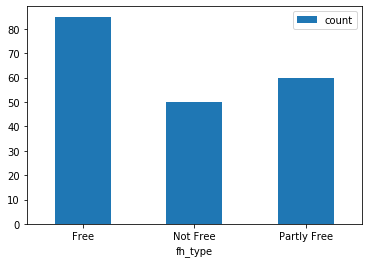

In [248]:
%matplotlib inline
dfx = pd.DataFrame({'fh_type': fh_type, 'count': count})
ax = dfx.plot.bar(x='fh_type', y='count', rot=0)